In [1]:
# Import the Libraries

import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load the Dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\USER\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Thu Jul 24 10:44:19 2025).


In [2]:
df_DA_explode = df_DA.explode('job_skills')

df_DA_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}"
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi..."


In [3]:
# Create a function that checks for the presence of Senior or 
# Junior in a particular value

def job_title_status(value):
    if 'Senior'.lower() in value.lower() :
       return 'Senior'
    else:
       return 'Junior'

In [4]:
# Create a column that holds the Job title cader
# for the particular job. If the job_title contains Senior
# in it's designation, a Senior entry is made for it. 
# Otherwise a Junior entry is made.

df_DA_explode['job_title_status'] = df_DA_explode['job_title'].apply(job_title_status)

In [5]:
df_DA_explode.sample(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_title_status
284448,Data Analyst,AML Data Analyst,Luxembourg,via Emplois Trabajo.org,Full-time,False,Luxembourg,2023-03-11 08:16:28,True,False,Luxembourg,None,NaN,NaN,SOFITEX TALENT RECRUITMENT,javascript,"{'analyst_tools': ['tableau', 'excel'], 'libra...",Junior
139098,Data Analyst,ENTRY LEVEL DATA ANALYST,"Montgomery, AL",via LinkedIn,Contractor,False,Georgia,2023-04-19 09:31:01,False,False,United States,None,NaN,NaN,SynergisticIT,javascript,"{'analyst_tools': ['tableau'], 'libraries': ['...",Junior
158948,Data Analyst,Entry Level Data Analyst,"San Jose, CA",via BeBee,Full-time,False,"California, United States",2023-11-22 08:01:14,False,False,United States,None,NaN,NaN,SynergisticIT,javascript,"{'analyst_tools': ['sas', 'tableau'], 'cloud':...",Junior


In [6]:
df_DA_status_group = df_DA_explode.groupby(['job_title_status', 'job_skills']).size()

df_DA_status_group = df_DA_status_group.reset_index(name = 'skills_count')

df_DA_status_group

,job_title_status,job_skills,skills_count
0,Junior,airflow,1936
1,Junior,airtable,88
2,Junior,alteryx,4467
3,Junior,angular,366
4,Junior,angular.js,2
...,...,...,...
385,Senior,windows,23
386,Senior,wire,1
387,Senior,word,199
388,Senior,wrike,1


In [7]:
df_DA_status_group = df_DA_status_group.sort_values('skills_count', ascending = False)

df_DA_status_group

,job_title_status,job_skills,skills_count
188,Junior,sql,90854
57,Junior,excel,65972
153,Junior,python,56110
201,Junior,tableau,45527
146,Junior,power bi,38783
...,...,...,...
241,Senior,asp.net core,1
136,Junior,ovh,1
239,Senior,asana,1
238,Senior,arch,1


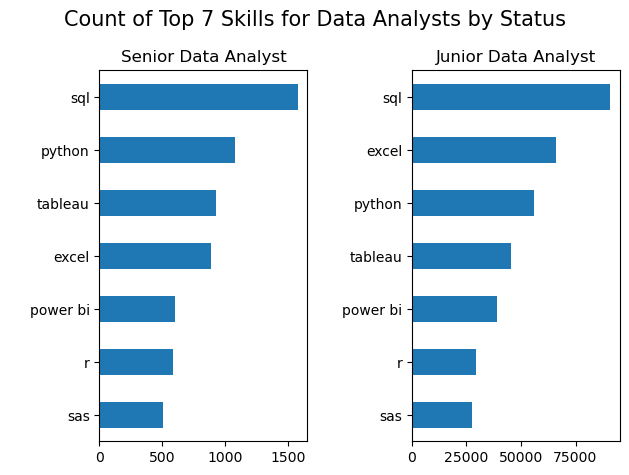

In [8]:
fig, ax = plt.subplots(1, 2)

top_skills = 7

job_status = ['Senior', 'Junior']

for i, status in enumerate(job_status):
    df_status = df_DA_status_group[df_DA_status_group['job_title_status'] == status].head(top_skills)
    df_status.plot(kind = 'barh', x = 'job_skills', y = 'skills_count', ax = ax[i], title = status + " Data Analyst")
    ax[i].invert_yaxis()
    ax[i].set_ylabel(" ")
    ax[i].legend().set_visible(False)

fig.suptitle(f'Count of Top {top_skills} Skills for Data Analysts by Status', fontsize = 15)

fig.tight_layout()



In [9]:
whatstatus = {'Senior' : True, 'Junior': False}

mask3 = df_DA_explode['job_title'].str.contains('Senior', case = False, na = False)

df_DA_explode[mask3 == True]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_title_status
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro...",Senior
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro...",Senior
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro...",Senior
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro...",Senior
1077,Data Analyst,Senior Business Intelligence Specialist / Data...,"Bucharest, Romania",via EJobs,Full-time,False,Romania,2023-04-26 14:33:06,True,False,Romania,None,NaN,NaN,SC NIKO GROUP COM S.R.L.,None,None,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785618,Data Analyst,Mid + to Senior BI Engineer,Colombia,"via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Colombia,2023-09-21 06:22:35,True,False,Colombia,None,NaN,NaN,Lean Tech,python,"{'analyst_tools': ['ssrs', 'ssis', 'power bi']...",Senior
785618,Data Analyst,Mid + to Senior BI Engineer,Colombia,"via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Colombia,2023-09-21 06:22:35,True,False,Colombia,None,NaN,NaN,Lean Tech,ssrs,"{'analyst_tools': ['ssrs', 'ssis', 'power bi']...",Senior
785618,Data Analyst,Mid + to Senior BI Engineer,Colombia,"via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Colombia,2023-09-21 06:22:35,True,False,Colombia,None,NaN,NaN,Lean Tech,ssis,"{'analyst_tools': ['ssrs', 'ssis', 'power bi']...",Senior
785618,Data Analyst,Mid + to Senior BI Engineer,Colombia,"via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Colombia,2023-09-21 06:22:35,True,False,Colombia,None,NaN,NaN,Lean Tech,power bi,"{'analyst_tools': ['ssrs', 'ssis', 'power bi']...",Senior


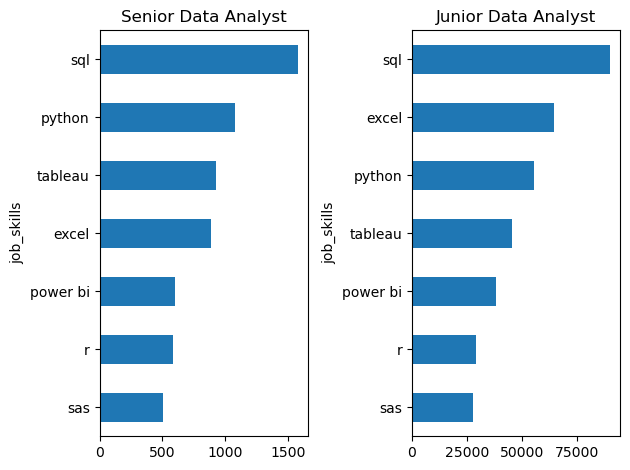

In [10]:
fig, ax = plt.subplots(1, 2)

what_status = {'Senior' : True, 'Junior': False}

for i, (status, condition) in enumerate(what_status.items()):

    mask3 = df_DA_explode['job_title'].str.contains(status, case = False, na = False)

    df_status = df_DA_explode[mask3 == condition]

    df_status_grouped = df_status.groupby(['job_skills']).size().reset_index(name = 'skills_count')

    df_status_grouped = df_status_grouped.sort_values('skills_count', ascending=False).head(7)

    df_status_grouped.plot(kind = 'barh', x = 'job_skills', y = 'skills_count', ax = ax[i], title = status + " Data Analyst")
    ax[i].invert_yaxis()
    ax[i].legend().set_visible(False)

    fig.tight_layout()

    # df_status.value_counts('job_title_short').plot(kind = 'barh', x = 'job_title_short',  ax = ax[i])

In [11]:
df_status

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_title_status
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Junior
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Junior
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Junior
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Junior
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Junior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}",Junior
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",Junior
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",Junior
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi...",Junior


In [12]:
df_US = df[df['job_country'] == 'United States'].copy()

In [13]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

job_list = [df_US[df_US['job_title_short'] == jobtitle] for jobtitle in job_titles]

job_list[0]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [14]:
job_list[1]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
11,Data Engineer,Data Engineer,"Colorado Springs, CO (+3 others)",via The Muse,Full-time,False,"Texas, United States",2023-11-03 13:06:51,False,True,United States,None,NaN,NaN,Philips,"[python, qlik]","{'analyst_tools': ['qlik'], 'programming': ['p..."
26,Data Engineer,Data Engineer,United States,via LinkedIn,Full-time,False,Georgia,2023-09-15 13:56:18,True,False,United States,None,NaN,NaN,Infinite Computer Solutions,None,None
27,Data Engineer,"Principal Data Engineer (Lead), Knowledge Grap...","San Francisco, CA",via LinkedIn,Full-time,False,Georgia,2023-02-18 13:31:24,False,False,United States,None,NaN,NaN,Altos Labs,"[python, r, java]","{'programming': ['python', 'r', 'java']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785276,Data Engineer,Internship - Data Engineer,"Plainsboro Township, NJ",via SimplyHired,Full-time,False,Georgia,2023-01-18 06:48:35,False,False,United States,None,NaN,NaN,Novo Nordisk,"[word, excel, powerpoint]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
785462,Data Engineer,Sr. Data Engineer,"Washington, DC",via Indeed,Full-time,False,"New York, United States",2023-01-13 06:08:48,True,True,United States,None,NaN,NaN,Zscaler,"[sql, python, snowflake, airflow, tableau, pow...","{'analyst_tools': ['tableau', 'power bi', 'exc..."
785469,Data Engineer,IT Data Engineer,"Carol Stream, IL",via Indeed,Full-time,False,"California, United States",2023-01-07 06:07:11,False,True,United States,None,NaN,NaN,ZIP-PAK,"[java, python, sql]","{'programming': ['java', 'python', 'sql']}"
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."


In [15]:
job_list[2]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
17,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,None,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"[go, apl, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
32,Data Scientist,Sr. Data Scientist (NLP) - Full-time / Part-time,"Dallas, TX",via Snagajob,Full-time,False,"Texas, United States",2023-03-13 13:07:03,False,True,United States,None,NaN,NaN,MCKESSON,"[python, azure, databricks, pyspark, pandas, h...","{'cloud': ['azure', 'databricks'], 'libraries'..."
40,Data Scientist,"Data Scientist, Data Strategy and Analytics","Alameda, CA",via Trabajo.org,Full-time,False,"California, United States",2023-04-26 13:05:10,False,False,United States,None,NaN,NaN,Abbott,None,None
41,Data Scientist,Data Scientist I,"Paris, KY",via Jobs By Care,Full-time,False,Georgia,2023-11-13 14:59:39,False,False,United States,None,NaN,NaN,Appalachian Regional Healthcare,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785578,Data Scientist,"Data Scientist, Advanced Motor Technology","Newark, CA",via Trabajo.org,Full-time,False,"California, United States",2023-05-30 06:02:25,False,True,United States,None,NaN,NaN,Lucid Motors,"[go, python, sql, matlab, numpy, pandas, sciki...","{'libraries': ['numpy', 'pandas', 'scikit-lear..."
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."
785651,Data Scientist,Data Scientist (Supply Chain Security),"Fort Belvoir, VA",via LinkedIn,Full-time,False,Georgia,2023-01-07 07:10:51,False,False,United States,None,NaN,NaN,Defense Logistics Agency,[go],{'programming': ['go']}
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None


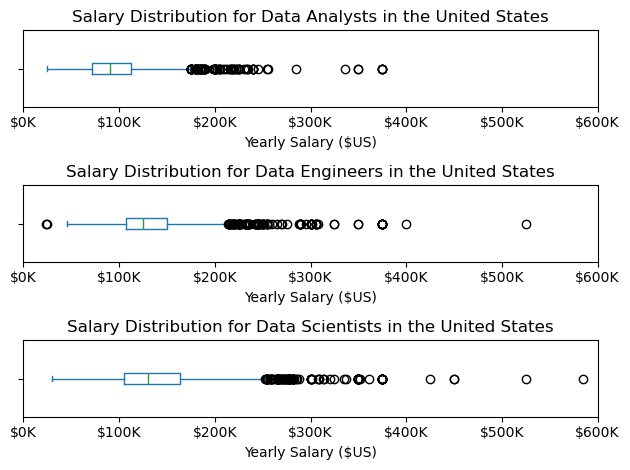

In [16]:
fig, ax = plt.subplots(3, 1)

for i, job in enumerate(job_titles):

  job_list[i]['salary_year_avg'].plot(kind = 'box', vert = False, ax = ax[i])
  ax[i].set_ylabel('')
  ax[i].set_xlabel('Yearly Salary ($US)')
  ax[i].set_title(f'Salary Distribution for {job}s in the United States')
  ax[i].set_yticklabels('')
  ax[i].set_xlim(0, 600000)
  ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))


fig.tight_layout()  

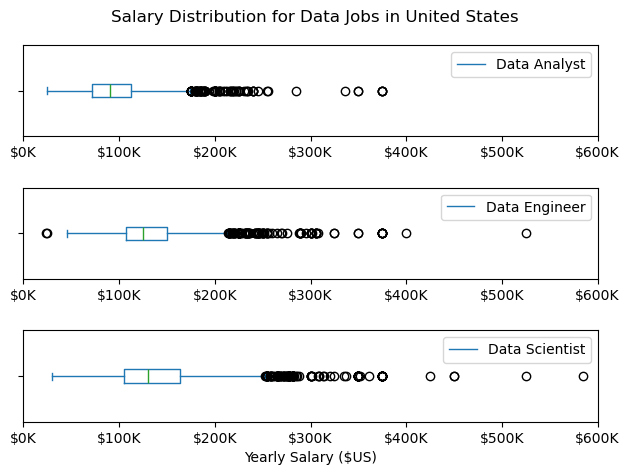

In [17]:
fig, ax = plt.subplots(3, 1)


job_list[0]['salary_year_avg'].plot(kind = 'box', vert = False, ax = ax[0])
ax[0].set_ylabel('')
ax[0].set_yticklabels('')
ax[0].set_xlim(0, 600000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
ax[0].legend([job_titles[0]])


job_list[1]['salary_year_avg'].plot(kind = 'box', vert = False, ax = ax[1])
ax[1].set_ylabel('')
ax[1].set_yticklabels('')
ax[1].set_xlim(0, 600000)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
ax[1].legend([job_titles[1]])

job_list[2]['salary_year_avg'].plot(kind = 'box', vert = False, ax = ax[2])
ax[2].set_ylabel('')
ax[2].set_xlabel('Yearly Salary ($US)')
ax[2].set_yticklabels('')
ax[2].set_xlim(0, 600000)
ax[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
ax[2].legend([job_titles[2]])

fig.suptitle('Salary Distribution for Data Jobs in United States')
fig.tight_layout(h_pad=2)  

In [19]:
# Load the Dataset

dataset2 = load_dataset('lukebarousse/data_jobs')
dfx = dataset2['train'].to_pandas()

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\USER\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Thu Jul 24 10:44:19 2025).


In [20]:
dfx['job_posted_date'][0]

'2023-06-16 13:44:15'